Github: https://github.com/JaidedAI/EasyOCR

uggingface demo: https://huggingface.co/spaces/tomofi/EasyOCR

## 1. Install packages

In [38]:
!pip install easyocr matplotlib

## 2. Import packages

In [1]:
import time
import easyocr
import cv2
from matplotlib import pyplot as plt

languages = ["en"]
image_path = './images/quan_nhau.jpg'

## 3. Plot function

In [2]:
def plot_bbox(easy_ocr_result, image):
    boxes = [line[0] for line in easy_ocr_result]
    texts = [line[1] for line in easy_ocr_result]
    scores = [line[2] for line in easy_ocr_result]

    for box, text in zip(boxes, texts):
        top_left     = (int(box[0][0]), int(box[0][1]))
        bottom_right = (int(box[2][0]), int(box[2][1]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image, boxes, texts, scores

## 4. Run EasyOCR

### 4.1 Using CPU

In [3]:
CPU_READER = easyocr.Reader(languages, gpu=False)

start = time.time()
cpu_result = CPU_READER.readtext(image_path)
print("Time taken to read text from image using CPU: ", time.time() - start)

Using CPU. Note: This module is much faster with a GPU.


Time taken to read text from image using CPU:  3.4911890029907227


### 4.2 Using GPU

In [4]:
GPU_READER = easyocr.Reader(languages, gpu=True)

start = time.time()
gpu_result = GPU_READER.readtext(image_path)
print("Time taken to read text from image using CPU: ", time.time() - start)

Time taken to read text from image using CPU:  0.5874593257904053


## 4. Show result

In [5]:
origin_image = cv2.imread(image_path)
image, boxes, texts, scores = plot_bbox(cpu_result, origin_image)

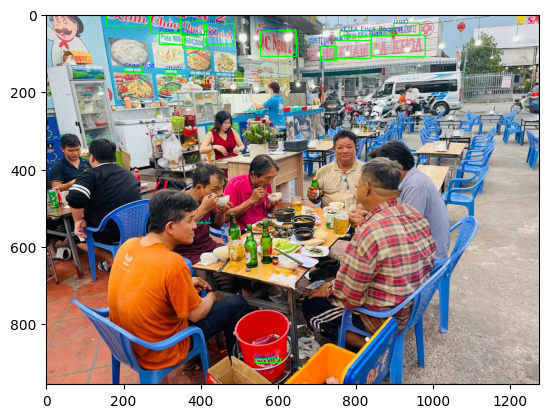

In [6]:
plt.imshow(image)

In [7]:
for box, text, score in zip(boxes, texts, scores):
    print(f"Text: {text}, Score: {score}")

Text: QNVUUl, Score: 0.11794122273909351
Text: Qzds, Score: 0.05033314693637451
Text: Izuz), Score: 0.011097982481365532
Text: Pass Wifi: , Score: 0.7660262852430144
Text: Jchug, Score: 0.23164540548415108
Text: NC, Score: 0.07771042437124415
Text: Lah, Score: 0.03544849259166791
Text: Chao Mad, Score: 0.30278892637080673
Text: chaoc, Score: 0.010186379083659658
Text: @hao ', Score: 0.3402876990226446
Text: Thfiah, Score: 0.053468451131561644
Text: VETEA EHcA Boqpzbl, Score: 0.0033583399201848807
Text: :,06042000, Score: 0.4123399303038855
Text: Kh, Score: 0.35392588761090604
Text: VFCM, Score: 0.05993768572807312
Text: BialyIEV, Score: 0.070585636297368
